<a href="https://colab.research.google.com/github/igoorsa/MachineLearning/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [36]:
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 80)
dados = pd.read_csv('/content/BRAZIL_CITIES.csv', sep=';', decimal=',')
dados.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,REGIAO_TUR,CATEGORIA_TUR,ESTIMATED_POP,RURAL_URBAN,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,...,GDP_CAPITA,GVA_MAIN,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876.0,6876.0,0.0,2137.0,1546.0,591.0,5300.0,69.0,318.0,438.0,517.0,3542.0,416.0,319.0,1843.0,1689.0,0.708,0.687,0.83,0.622,-49.44054783,-16.75881189,893.6,360.0,842.0,147.26,NaN,NaN,8583.0,Urbano,6.2,27991.25,74750.32,36915.04,145857.6,20554.2,166.41,...,20664.57,Demais serviços,28227691.0,284.0,5.0,1.0,56.0,0.0,2.0,29.0,110.0,26.0,4.0,5.0,0.0,2.0,10.0,12.0,4.0,6.0,6.0,1.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2158.0,1246.0,0.0,NaN,NaN,NaN,1.0
1,Abadia Dos Dourados,MG,0,6704.0,6704.0,0.0,2328.0,1481.0,847.0,4154.0,38.0,207.0,260.0,351.0,2709.0,589.0,4479.0,18017.0,2207.0,0.69,0.693,0.839,0.563,-47.39683244,-18.48756496,753.12,77.0,296.0,881.06,Caminhos Do Cerrado,D,6972.0,Rural Adjacente,50524.57,25917.7,62689.23,28083.79,167215.28,12873.5,180.09,...,25591.7,Demais serviços,17909274.0,476.0,6.0,6.0,30.0,1.0,2.0,34.0,190.0,70.0,28.0,11.0,0.0,4.0,15.0,29.0,2.0,9.0,14.0,6.0,19.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2227.0,1142.0,0.0,NaN,NaN,NaN,1.0
2,Abadiânia,GO,0,15757.0,15609.0,148.0,4655.0,3233.0,1422.0,10656.0,139.0,650.0,894.0,1087.0,6896.0,990.0,10307.0,33085.0,2202.0,0.69,0.671,0.841,0.579,-48.71881214,-16.18267186,1017.55,227.0,720.0,"1,045.13",Região Turística Do Ouro E Cristais,C,19614.0,Rural Adjacente,42.84,16728.3,138198.58,63396.2,261161.91,26822.58,287984.49,...,15628.4,Demais serviços,37513019.0,288.0,5.0,9.0,26.0,0.0,2.0,7.0,117.0,12.0,57.0,2.0,1.0,0.0,7.0,15.0,3.0,11.0,5.0,1.0,8.0,0.0,0.0,1.0,34.0,1.0,1.0,1.0,1.0,33724584.0,67091904.0,2838.0,1426.0,0.0,NaN,NaN,NaN,3.0
3,Abaeté,MG,0,22690.0,22690.0,0.0,7694.0,6667.0,1027.0,18464.0,176.0,856.0,1233.0,1539.0,11979.0,2681.0,1862.0,7502.0,1994.0,0.698,0.72,0.848,0.556,-45.44619142,-19.15584769,644.74,1230.0,1716.0,"1,817.07",Lago De Três Marias,D,23223.0,Urbano,113824.6,31002.62,172.33,86081.41,403241.27,26994.09,430235.36,...,18250.42,Demais serviços,NaN,621.0,18.0,1.0,40.0,0.0,1.0,20.0,303.0,62.0,30.0,9.0,6.0,4.0,28.0,27.0,2.0,15.0,19.0,9.0,27.0,0.0,0.0,NaN,NaN,2.0,2.0,2.0,2.0,44974716.0,371922572.0,6928.0,2953.0,0.0,NaN,NaN,NaN,4.0
4,Abaetetuba,PA,0,141100.0,141040.0,60.0,31061.0,19057.0,12004.0,82956.0,1354.0,5567.0,7618.0,8905.0,53516.0,5996.0,25200.0,700872.0,3530.0,0.628,0.579,0.798,0.537,-48.88440382,-1.723469863,10.12,3389.0,1218.0,"1,610.65",Araguaia-Tocantins,D,156292.0,Urbano,140463.72,58610,468128.69,486872.4,1154074.81,95180.48,1249255.29,...,8222.36,"Administração, defesa, educação e saúde públic...",NaN,931.0,4.0,2.0,43.0,0.0,1.0,27.0,500.0,16.0,31.0,6.0,1.0,1.0,22.0,16.0,2.0,155.0,33.0,15.0,56.0,0.0,0.0,NaN,NaN,2.0,4.0,2.0,4.0,76181384.0,800078483.0,5277.0,25661.0,0.0,NaN,NaN,NaN,2.0


In [37]:
dados.drop(['CITY','IDHM_Renda','IDHM Ranking 2010', 'IDHM_Longevidade','IDHM_Educacao',
            'LONG','LAT','GVA_MAIN','MUN_EXPENDIT','HOTELS','BEDS','Pr_Agencies',
            'Pu_Agencies','Pr_Bank','Pu_Bank','Pr_Assets','Pu_Assets','UBER',
            'MAC','WAL-MART'], axis=1, inplace=True)

In [38]:
dados.head()

,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM,ALT,PAY_TV,FIXED_PHONES,AREA,REGIAO_TUR,CATEGORIA_TUR,ESTIMATED_POP,RURAL_URBAN,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,POP_GDP,GDP_CAPITA,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,Cars,Motorcycles,Wheeled_tractor,POST_OFFICES
0,GO,0,6876.0,6876.0,0.0,2137.0,1546.0,591.0,5300.0,69.0,318.0,438.0,517.0,3542.0,416.0,319.0,1843.0,0.708,893.6,360.0,842.0,147.26,NaN,NaN,8583.0,Urbano,6.2,27991.25,74750.32,36915.04,145857.6,20554.2,166.41,8053.0,20664.57,284.0,5.0,1.0,56.0,0.0,2.0,29.0,110.0,26.0,4.0,5.0,0.0,2.0,10.0,12.0,4.0,6.0,6.0,1.0,5.0,0.0,0.0,2158.0,1246.0,0.0,1.0
1,MG,0,6704.0,6704.0,0.0,2328.0,1481.0,847.0,4154.0,38.0,207.0,260.0,351.0,2709.0,589.0,4479.0,18017.0,0.69,753.12,77.0,296.0,881.06,Caminhos Do Cerrado,D,6972.0,Rural Adjacente,50524.57,25917.7,62689.23,28083.79,167215.28,12873.5,180.09,7037.0,25591.7,476.0,6.0,6.0,30.0,1.0,2.0,34.0,190.0,70.0,28.0,11.0,0.0,4.0,15.0,29.0,2.0,9.0,14.0,6.0,19.0,0.0,0.0,2227.0,1142.0,0.0,1.0
2,GO,0,15757.0,15609.0,148.0,4655.0,3233.0,1422.0,10656.0,139.0,650.0,894.0,1087.0,6896.0,990.0,10307.0,33085.0,0.69,1017.55,227.0,720.0,"1,045.13",Região Turística Do Ouro E Cristais,C,19614.0,Rural Adjacente,42.84,16728.3,138198.58,63396.2,261161.91,26822.58,287984.49,18427.0,15628.4,288.0,5.0,9.0,26.0,0.0,2.0,7.0,117.0,12.0,57.0,2.0,1.0,0.0,7.0,15.0,3.0,11.0,5.0,1.0,8.0,0.0,0.0,2838.0,1426.0,0.0,3.0
3,MG,0,22690.0,22690.0,0.0,7694.0,6667.0,1027.0,18464.0,176.0,856.0,1233.0,1539.0,11979.0,2681.0,1862.0,7502.0,0.698,644.74,1230.0,1716.0,"1,817.07",Lago De Três Marias,D,23223.0,Urbano,113824.6,31002.62,172.33,86081.41,403241.27,26994.09,430235.36,23574.0,18250.42,621.0,18.0,1.0,40.0,0.0,1.0,20.0,303.0,62.0,30.0,9.0,6.0,4.0,28.0,27.0,2.0,15.0,19.0,9.0,27.0,0.0,0.0,6928.0,2953.0,0.0,4.0
4,PA,0,141100.0,141040.0,60.0,31061.0,19057.0,12004.0,82956.0,1354.0,5567.0,7618.0,8905.0,53516.0,5996.0,25200.0,700872.0,0.628,10.12,3389.0,1218.0,"1,610.65",Araguaia-Tocantins,D,156292.0,Urbano,140463.72,58610,468128.69,486872.4,1154074.81,95180.48,1249255.29,151934.0,8222.36,931.0,4.0,2.0,43.0,0.0,1.0,27.0,500.0,16.0,31.0,6.0,1.0,1.0,22.0,16.0,2.0,155.0,33.0,15.0,56.0,0.0,0.0,5277.0,25661.0,0.0,2.0


In [39]:
dados.dtypes

STATE                      object
CAPITAL                     int64
IBGE_RES_POP              float64
IBGE_RES_POP_BRAS         float64
IBGE_RES_POP_ESTR         float64
IBGE_DU                   float64
IBGE_DU_URBAN             float64
IBGE_DU_RURAL             float64
IBGE_POP                  float64
IBGE_1                    float64
IBGE_1-4                  float64
IBGE_5-9                  float64
IBGE_10-14                float64
IBGE_15-59                float64
IBGE_60+                  float64
IBGE_PLANTED_AREA         float64
IBGE_CROP_PRODUCTION_$    float64
IDHM                       object
ALT                        object
PAY_TV                    float64
FIXED_PHONES              float64
AREA                       object
REGIAO_TUR                 object
CATEGORIA_TUR              object
ESTIMATED_POP             float64
RURAL_URBAN                object
GVA_AGROPEC                object
GVA_INDUSTRY               object
GVA_SERVICES               object
GVA_PUBLIC    

In [40]:
dados.isnull().sum()/len(dados['STATE'])*100

STATE                      0.000000
CAPITAL                    0.000000
IBGE_RES_POP               0.143549
IBGE_RES_POP_BRAS          0.143549
IBGE_RES_POP_ESTR          0.143549
IBGE_DU                    0.179437
IBGE_DU_URBAN              0.179437
IBGE_DU_RURAL              1.453436
IBGE_POP                   0.143549
IBGE_1                     0.143549
IBGE_1-4                   0.143549
IBGE_5-9                   0.143549
IBGE_10-14                 0.143549
IBGE_15-59                 0.143549
IBGE_60+                   0.143549
IBGE_PLANTED_AREA          0.053831
IBGE_CROP_PRODUCTION_$     0.053831
IDHM                       0.143549
ALT                        0.161493
PAY_TV                     0.053831
FIXED_PHONES               0.053831
AREA                       0.053831
REGIAO_TUR                41.055087
CATEGORIA_TUR             41.055087
ESTIMATED_POP              0.053831
RURAL_URBAN                0.053831
GVA_AGROPEC                0.053831
GVA_INDUSTRY               0

In [42]:
dados.corr()

<ipython-input-42-27ee38a39a92>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados.corr()


,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,PAY_TV,FIXED_PHONES,ESTIMATED_POP,POP_GDP,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,Cars,Motorcycles,Wheeled_tractor,POST_OFFICES
CAPITAL,1.000000,0.567152,0.568763,0.331483,0.554469,0.554671,0.178174,0.568855,0.592361,0.590469,0.585476,0.584419,0.571480,0.511380,0.000424,0.003404,0.493555,0.464740,0.572502,0.572817,0.479269,0.092384,0.393663,0.429451,0.514109,0.525906,0.509244,0.505581,0.405913,0.514538,0.347282,0.368697,0.439033,0.461938,0.466932,0.849953,0.509658,0.513984,0.494582,0.525476,NaN,0.354888,0.484210,0.597414,0.371637,0.561167
IBGE_RES_POP,0.567152,1.000000,0.999993,0.904065,0.998566,0.997830,0.339408,0.997886,0.989630,0.990121,0.991492,0.993066,0.997575,0.985106,0.013561,0.027146,0.970987,0.964898,0.999609,0.999580,0.960272,0.163413,0.558704,0.915390,0.875122,0.956894,0.951108,0.962891,0.924874,0.969322,0.887721,0.897738,0.930909,0.942035,0.949454,0.733828,0.978864,0.968979,0.958196,0.977352,NaN,0.605786,0.965387,0.938516,0.791112,0.917967
IBGE_RES_POP_BRAS,0.568763,0.999993,1.000000,0.902430,0.998474,0.997726,0.340186,0.997858,0.989774,0.990267,0.991627,0.993204,0.997564,0.984712,0.013677,0.027358,0.970376,0.964082,0.999633,0.999612,0.959552,0.163532,0.559293,0.914842,0.874297,0.956820,0.950610,0.962465,0.924055,0.968812,0.886216,0.896310,0.929915,0.941072,0.948548,0.735304,0.978352,0.968415,0.957545,0.976857,NaN,0.605793,0.964815,0.938808,0.790349,0.917943
IBGE_RES_POP_ESTR,0.331483,0.904065,0.902430,1.000000,0.912258,0.912935,0.226360,0.904558,0.877706,0.877853,0.880459,0.881482,0.902384,0.934043,-0.000761,0.000801,0.945557,0.963143,0.900137,0.899268,0.948113,0.134205,0.438521,0.888346,0.883007,0.872671,0.914932,0.917446,0.927206,0.932774,0.970704,0.971084,0.952362,0.958935,0.959215,0.497218,0.941525,0.938580,0.938547,0.938375,NaN,0.546358,0.936120,0.814963,0.800211,0.832352
IBGE_DU,0.554469,0.998566,0.998474,0.912258,1.000000,0.999677,0.325818,0.995641,0.982398,0.982884,0.984820,0.987152,0.995119,0.991127,0.013487,0.026150,0.977632,0.970070,0.997388,0.997259,0.963680,0.163773,0.571093,0.914357,0.887625,0.956111,0.952661,0.963149,0.926140,0.972801,0.891240,0.902531,0.935619,0.948415,0.957365,0.722330,0.981197,0.973289,0.969632,0.983622,NaN,0.603142,0.966779,0.929290,0.792866,0.920947
IBGE_DU_URBAN,0.554671,0.997830,0.997726,0.912935,0.999677,1.000000,0.297757,0.995370,0.981425,0.981884,0.983871,0.986352,0.994877,0.991747,0.011926,0.023131,0.978316,0.970600,0.996560,0.996403,0.963599,0.163776,0.570055,0.913871,0.888935,0.955864,0.952581,0.962447,0.925930,0.972803,0.891195,0.902770,0.935832,0.948892,0.958101,0.721384,0.980815,0.973232,0.970529,0.983666,NaN,0.600712,0.966693,0.926429,0.792512,0.918565
IBGE_DU_RURAL,0.178174,0.339408,0.340186,0.226360,0.325818,0.297757,1.000000,0.314452,0.333247,0.335027,0.334566,0.331913,0.311833,0.289866,0.059443,0.117719,0.274866,0.258902,0.340966,0.341194,0.278157,0.040022,0.259434,0.272417,0.226947,0.295967,0.278915,0.302462,0.263618,0.284483,0.236424,0.232005,0.252102,0.253797,0.252468,0.272642,0.303337,0.283867,0.277388,0.301141,NaN,0.252152,0.281031,0.383141,0.243280,0.385435
IBGE_POP,0.568855,0.997886,0.997858,0.904558,0.995641,0.995370,0.314452,1.000000,0.994069,0.994370,0.995391,0.996584,0.999866,0.983331,0.013986,0.026505,0.971373,0.967778,0.998051,0.997901,0.965293,0.167589,0.548424,0.925432,0.871284,0.963083,0.958497,0.969354,0.932373,0.972896,0.895117,0.904694,0.936960,0.946089,0.951445,0.737144,0.981053,0.969687,0.954896,0.977506,NaN,0.610735,0.971431,0.945120,0.802567,0.917018
IBGE_1,0.592361,0.989630,0.989774,0.877706,0.982398,0.981425,0.333247,0.994069,1.000000,0.999845,0.999546,0.998860,0.994209,0.959993,0.020105,0.033970,0.949554,0.947088,0.992066,0.9

<ipython-input-43-3c0e1fc7d43a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados.corr())


<Axes: >

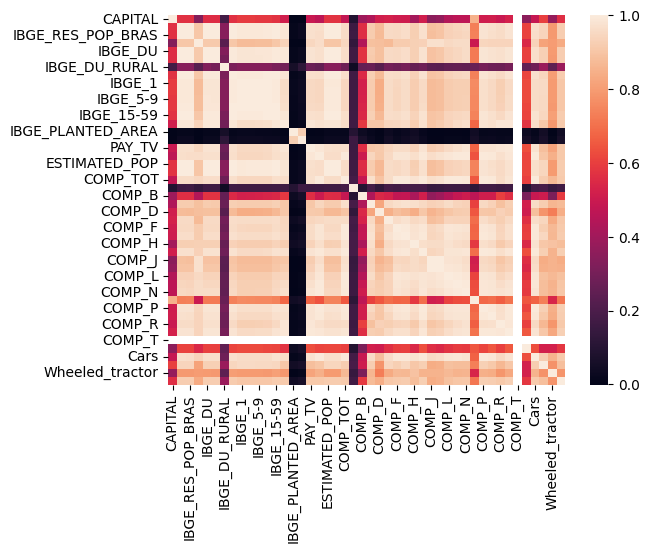

In [43]:
sns.heatmap(dados.corr())

In [44]:
dados.drop(['COMP_T','IBGE_RES_POP_BRAS','IBGE_DU_URBAN','IBGE_POP','IBGE_10-14','REGIAO_TUR','CATEGORIA_TUR','IBGE_DU','IBGE_1','IBGE_1-4','IBGE_5-9',
            'IBGE_15-59','IBGE_60+','ESTIMATED_POP','POP_GDP'], axis= 1, inplace= True)

In [45]:
dados.corr()

<ipython-input-45-27ee38a39a92>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados.corr()


,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_ESTR,IBGE_DU_RURAL,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,PAY_TV,FIXED_PHONES,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_U,Cars,Motorcycles,Wheeled_tractor,POST_OFFICES
CAPITAL,1.000000,0.567152,0.331483,0.178174,0.000424,0.003404,0.493555,0.464740,0.479269,0.092384,0.393663,0.429451,0.514109,0.525906,0.509244,0.505581,0.405913,0.514538,0.347282,0.368697,0.439033,0.461938,0.466932,0.849953,0.509658,0.513984,0.494582,0.525476,0.354888,0.484210,0.597414,0.371637,0.561167
IBGE_RES_POP,0.567152,1.000000,0.904065,0.339408,0.013561,0.027146,0.970987,0.964898,0.960272,0.163413,0.558704,0.915390,0.875122,0.956894,0.951108,0.962891,0.924874,0.969322,0.887721,0.897738,0.930909,0.942035,0.949454,0.733828,0.978864,0.968979,0.958196,0.977352,0.605786,0.965387,0.938516,0.791112,0.917967
IBGE_RES_POP_ESTR,0.331483,0.904065,1.000000,0.226360,-0.000761,0.000801,0.945557,0.963143,0.948113,0.134205,0.438521,0.888346,0.883007,0.872671,0.914932,0.917446,0.927206,0.932774,0.970704,0.971084,0.952362,0.958935,0.959215,0.497218,0.941525,0.938580,0.938547,0.938375,0.546358,0.936120,0.814963,0.800211,0.832352
IBGE_DU_RURAL,0.178174,0.339408,0.226360,1.000000,0.059443,0.117719,0.274866,0.258902,0.278157,0.040022,0.259434,0.272417,0.226947,0.295967,0.278915,0.302462,0.263618,0.284483,0.236424,0.232005,0.252102,0.253797,0.252468,0.272642,0.303337,0.283867,0.277388,0.301141,0.252152,0.281031,0.383141,0.243280,0.385435
IBGE_PLANTED_AREA,0.000424,0.013561,-0.000761,0.059443,1.000000,0.924268,0.002736,0.006143,0.016449,0.097111,0.036718,0.017732,0.005616,0.033822,0.017107,0.027345,0.039857,0.016976,0.000311,-0.000046,0.005718,0.006578,0.001680,0.044574,0.012774,0.017564,0.011519,0.014103,0.034853,0.014597,0.047949,0.002574,0.045725
IBGE_CROP_PRODUCTION_$,0.003404,0.027146,0.000801,0.117719,0.924268,1.000000,0.011382,0.013466,0.026835,0.161028,0.061881,0.030285,0.007869,0.046326,0.026516,0.040932,0.052127,0.029674,0.003340,0.003216,0.011833,0.012364,0.007430,0.055076,0.024220,0.028060,0.021321,0.024225,0.055558,0.026380,0.065225,0.013973,0.061194
PAY_TV,0.493555,0.970987,0.945557,0.274866,0.002736,0.011382,1.000000,0.985165,0.972135,0.158448,0.558691,0.905067,0.913439,0.942323,0.957372,0.956999,0.933830,0.978963,0.921652,0.932150,0.956539,0.972136,0.980798,0.673151,0.979356,0.976876,0.985501,0.989500,0.631101,0.974226,0.884213,0.816941,0.907613
FIXED_PHONES,0.464740,0.964898,0.963143,0.258902,0.006143,0.013466,0.985165,1.000000,0.994147,0.162982,0.500464,0.944541,0.908922,0.951000,0.981595,0.981297,0.967239,0.990228,0.964798,0.973248,0.987238,0.992997,0.992304,0.639849,0.992819,0.988580,0.971420,0.987223,0.609339,0.992289,0.899399,0.846026,0.907250
COMP_TOT,0.479269,0.960272,0.948113,0.278157,0.016449,0.026835,0.972135,0.994147,1.000000,0.181940,0.485800,0.965800,0.897861,0.960488,0.993039,0.993750,0.979437,0.993613,0.966730,0.974684,0.993260,0.992536,0.989758,0.651780,0.994610,0.989115,0.959795,0.982102,0.598885,0.994035,0.918503,0.868096,0.913894
COMP_A,0.092384,0.163413,0.134205,0.040022,0.097111,0.161028,0.158448,0.162982,0.181940,1.000000,0.098572,0.180195,0.131630,0.182191,0.174107,0.185902,0.182373,0.179784,0.145947,0.149448,0.163182,0.159036,0.156266,0.118563,0.169096,0.169318,0.158109,0.163601,0.096706,0.175689,0.189637,0.144740,0.168211


<ipython-input-46-3c0e1fc7d43a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados.corr())


<Axes: >

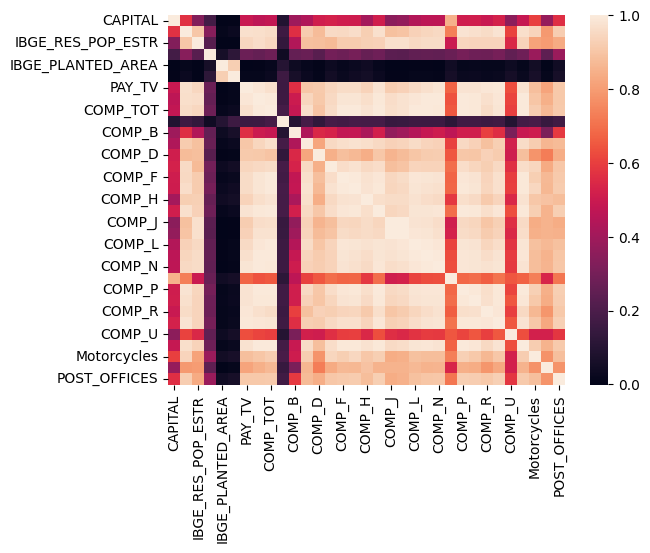

In [46]:
sns.heatmap(dados.corr())

In [47]:
dados.drop(['FIXED_PHONES','COMP_F','COMP_G','COMP_I','COMP_L','COMP_M'],axis=1, inplace= True)

In [48]:
dados.corr()

<ipython-input-48-27ee38a39a92>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados.corr()


,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_ESTR,IBGE_DU_RURAL,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,PAY_TV,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_H,COMP_J,COMP_K,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_U,Cars,Motorcycles,Wheeled_tractor,POST_OFFICES
CAPITAL,1.000000,0.567152,0.331483,0.178174,0.000424,0.003404,0.493555,0.479269,0.092384,0.393663,0.429451,0.514109,0.525906,0.405913,0.347282,0.368697,0.466932,0.849953,0.509658,0.513984,0.494582,0.525476,0.354888,0.484210,0.597414,0.371637,0.561167
IBGE_RES_POP,0.567152,1.000000,0.904065,0.339408,0.013561,0.027146,0.970987,0.960272,0.163413,0.558704,0.915390,0.875122,0.956894,0.924874,0.887721,0.897738,0.949454,0.733828,0.978864,0.968979,0.958196,0.977352,0.605786,0.965387,0.938516,0.791112,0.917967
IBGE_RES_POP_ESTR,0.331483,0.904065,1.000000,0.226360,-0.000761,0.000801,0.945557,0.948113,0.134205,0.438521,0.888346,0.883007,0.872671,0.927206,0.970704,0.971084,0.959215,0.497218,0.941525,0.938580,0.938547,0.938375,0.546358,0.936120,0.814963,0.800211,0.832352
IBGE_DU_RURAL,0.178174,0.339408,0.226360,1.000000,0.059443,0.117719,0.274866,0.278157,0.040022,0.259434,0.272417,0.226947,0.295967,0.263618,0.236424,0.232005,0.252468,0.272642,0.303337,0.283867,0.277388,0.301141,0.252152,0.281031,0.383141,0.243280,0.385435
IBGE_PLANTED_AREA,0.000424,0.013561,-0.000761,0.059443,1.000000,0.924268,0.002736,0.016449,0.097111,0.036718,0.017732,0.005616,0.033822,0.039857,0.000311,-0.000046,0.001680,0.044574,0.012774,0.017564,0.011519,0.014103,0.034853,0.014597,0.047949,0.002574,0.045725
IBGE_CROP_PRODUCTION_$,0.003404,0.027146,0.000801,0.117719,0.924268,1.000000,0.011382,0.026835,0.161028,0.061881,0.030285,0.007869,0.046326,0.052127,0.003340,0.003216,0.007430,0.055076,0.024220,0.028060,0.021321,0.024225,0.055558,0.026380,0.065225,0.013973,0.061194
PAY_TV,0.493555,0.970987,0.945557,0.274866,0.002736,0.011382,1.000000,0.972135,0.158448,0.558691,0.905067,0.913439,0.942323,0.933830,0.921652,0.932150,0.980798,0.673151,0.979356,0.976876,0.985501,0.989500,0.631101,0.974226,0.884213,0.816941,0.907613
COMP_TOT,0.479269,0.960272,0.948113,0.278157,0.016449,0.026835,0.972135,1.000000,0.181940,0.485800,0.965800,0.897861,0.960488,0.979437,0.966730,0.974684,0.989758,0.651780,0.994610,0.989115,0.959795,0.982102,0.598885,0.994035,0.918503,0.868096,0.913894
COMP_A,0.092384,0.163413,0.134205,0.040022,0.097111,0.161028,0.158448,0.181940,1.000000,0.098572,0.180195,0.131630,0.182191,0.182373,0.145947,0.149448,0.156266,0.118563,0.169096,0.169318,0.158109,0.163601,0.096706,0.175689,0.189637,0.144740,0.168211
COMP_B,0.393663,0.558704,0.438521,0.259434,0.036718,0.061881,0.558691,0.485800,0.098572,1.000000,0.431076,0.544253,0.527611,0.425147,0.364798,0.396198,0.505115,0.467178,0.513849,0.513170,0.599594,0.561645,0.310978,0.491599,0.506670,0.314562,0.586142


<ipython-input-49-3c0e1fc7d43a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados.corr())


<Axes: >

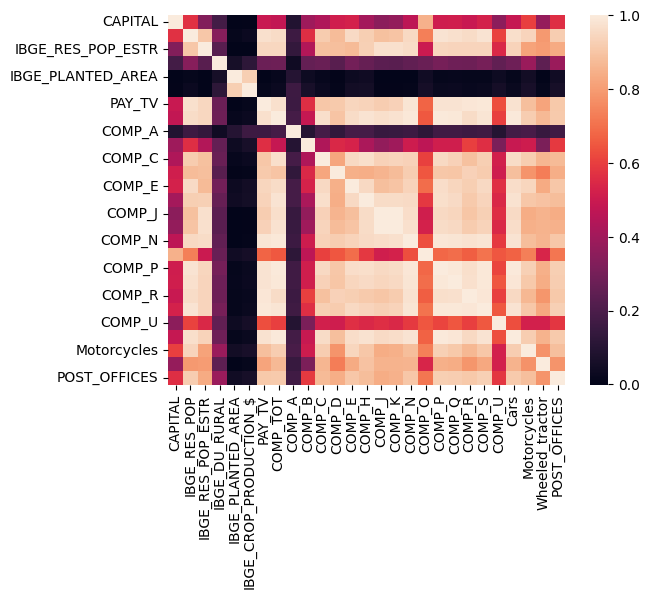

In [49]:
sns.heatmap(dados.corr())

In [51]:
dados.drop(['COMP_P','COMP_Q','COMP_K'], axis = 1, inplace = True)

In [97]:
dados.head(80)

,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_ESTR,IBGE_DU_RURAL,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM,ALT,PAY_TV,RURAL_URBAN,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,TAXES,GDP,GDP_CAPITA,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_H,COMP_J,COMP_N,COMP_O,COMP_R,COMP_S,COMP_U,Cars,Motorcycles,Wheeled_tractor,POST_OFFICES,GVA_TOTAL
0,GO,0,6876.0,0.0,591.0,319.0,1843.0,0.708,893.60,360.0,Urbano,6.20,27991.25,74750.32,36915.04,20554.20,166.41,20664.57,284.0,5.0,1.0,56.0,0.0,2.0,26.0,5.0,12.0,4.0,1.0,5.0,0.0,2158.0,1246.0,0.0,1.0,145857.60
1,MG,0,6704.0,0.0,847.0,4479.0,18017.0,0.690,753.12,77.0,Rural Adjacente,50524.57,25917.70,62689.23,28083.79,12873.50,180.09,25591.70,476.0,6.0,6.0,30.0,1.0,2.0,70.0,11.0,29.0,2.0,6.0,19.0,0.0,2227.0,1142.0,0.0,1.0,167215.28
2,GO,0,15757.0,148.0,1422.0,10307.0,33085.0,0.690,1017.55,227.0,Rural Adjacente,42.84,16728.30,138198.58,63396.20,26822.58,287984.49,15628.40,288.0,5.0,9.0,26.0,0.0,2.0,12.0,2.0,15.0,3.0,1.0,8.0,0.0,2838.0,1426.0,0.0,3.0,261161.91
3,MG,0,22690.0,0.0,1027.0,1862.0,7502.0,0.698,644.74,1230.0,Urbano,113824.60,31002.62,172.33,86081.41,26994.09,430235.36,18250.42,621.0,18.0,1.0,40.0,0.0,1.0,62.0,9.0,27.0,2.0,9.0,27.0,0.0,6928.0,2953.0,0.0,4.0,403241.27
4,PA,0,141100.0,60.0,12004.0,25200.0,700872.0,0.628,10.12,3389.0,Urbano,140463.72,58610.00,468128.69,486872.40,95180.48,1249255.29,8222.36,931.0,4.0,2.0,43.0,0.0,1.0,16.0,6.0,16.0,2.0,15.0,56.0,0.0,5277.0,25661.0,0.0,2.0,1154074.81
5,CE,0,10496.0,0.0,1540.0,2598.0,5234.0,0.628,403.11,29.0,Rural Adjacente,4435.16,5.88,22.81,35989.96,4042.79,73151.46,6370.41,86.0,1.0,0.0,4.0,0.0,0.0,2.0,2.0,3.0,2.0,0.0,4.0,0.0,553.0,1674.0,0.0,1.0,69108.67
6,BA,0,8316.0,0.0,1379.0,895.0,3999.0,0.603,674.22,952.0,Rural Remoto,12.41,3437.43,17990.74,28463.74,2019.77,64324.59,6982.70,191.0,6.0,0.0,8.0,0.0,1.0,5.0,3.0,5.0,2.0,2.0,38.0,0.0,896.0,696.0,0.0,1.0,62304.83
7,BA,0,17064.0,0.0,1953.0,2058.0,22761.0,0.575,316.38,51.0,Rural Remoto,9176.40,6.70,36921.84,65.75,6.21,124754.26,6256.80,87.0,2.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,4.0,0.0,613.0,1532.0,0.0,1.0,118.55
8,PR,0,7764.0,0.0,622.0,1197.0,9943.0,0.687,579.30,55.0,Rural Adjacente,73340.52,8839.71,42999.37,34103.49,5.77,165048.21,21173.60,285.0,5.0,0.0,20.0,0.0,1.0,18.0,8.0,26.0,2.0,4.0,12.0,0.0,2168.0,912.0,0.0,1.0,159283.08
9,SC,0,2653.0,0.0,614.0,5502.0,26195.0,0.690,720.98,109.0,Rural Adjacente,24996.75,3578.87,16011.10,17842.64,2312.65,64742.01,24739.02,69.0,2.0,0.0,4.0,0.0,0.0,8.0,1.0,0.0,2.0,0.0,3.0,0.0,976.0,345.0,2.0,1.0,62429.36


In [52]:
dados.dtypes

STATE                      object
CAPITAL                     int64
IBGE_RES_POP              float64
IBGE_RES_POP_ESTR         float64
IBGE_DU_RURAL             float64
IBGE_PLANTED_AREA         float64
IBGE_CROP_PRODUCTION_$    float64
IDHM                       object
ALT                        object
PAY_TV                    float64
AREA                       object
RURAL_URBAN                object
GVA_AGROPEC                object
GVA_INDUSTRY               object
GVA_SERVICES               object
GVA_PUBLIC                 object
 GVA_TOTAL                 object
TAXES                      object
GDP                        object
GDP_CAPITA                 object
COMP_TOT                  float64
COMP_A                    float64
COMP_B                    float64
COMP_C                    float64
COMP_D                    float64
COMP_E                    float64
COMP_H                    float64
COMP_J                    float64
COMP_N                    float64
COMP_O        

In [80]:
dados.drop('AREA', axis =1, inplace=True)

In [91]:
dados.drop(' GVA_TOTAL ',axis=1, inplace=True)

In [89]:
dados.IDHM = dados.IDHM.astype(float)
dados.ALT = dados.ALT.astype(float)
dados.GVA_AGROPEC = dados.GVA_AGROPEC.astype(float)
dados.GVA_INDUSTRY = dados.GVA_INDUSTRY.astype(float)
dados.GVA_SERVICES = dados.GVA_SERVICES.astype(float)
dados.GVA_PUBLIC = dados.GVA_PUBLIC.astype(float)

dados['TAXES'] = dados['TAXES'].astype(float)
dados['GDP'] = dados['GDP'].astype(float)
dados['GDP_CAPITA'] = dados['GDP_CAPITA'].astype(float)

In [92]:
dados.dtypes

STATE                      object
CAPITAL                     int64
IBGE_RES_POP              float64
IBGE_RES_POP_ESTR         float64
IBGE_DU_RURAL             float64
IBGE_PLANTED_AREA         float64
IBGE_CROP_PRODUCTION_$    float64
IDHM                      float64
ALT                       float64
PAY_TV                    float64
RURAL_URBAN                object
GVA_AGROPEC               float64
GVA_INDUSTRY              float64
GVA_SERVICES              float64
GVA_PUBLIC                float64
TAXES                     float64
GDP                       float64
GDP_CAPITA                float64
COMP_TOT                  float64
COMP_A                    float64
COMP_B                    float64
COMP_C                    float64
COMP_D                    float64
COMP_E                    float64
COMP_H                    float64
COMP_J                    float64
COMP_N                    float64
COMP_O                    float64
COMP_R                    float64
COMP_S        

In [94]:
dados.isnull().sum()/len(dados.STATE)*100

STATE                     0.000000
CAPITAL                   0.000000
IBGE_RES_POP              0.143549
IBGE_RES_POP_ESTR         0.143549
IBGE_DU_RURAL             1.453436
IBGE_PLANTED_AREA         0.053831
IBGE_CROP_PRODUCTION_$    0.053831
IDHM                      0.143549
ALT                       0.161493
PAY_TV                    0.053831
RURAL_URBAN               0.053831
GVA_AGROPEC               0.053831
GVA_INDUSTRY              0.053831
GVA_SERVICES              0.053831
GVA_PUBLIC                0.053831
TAXES                     0.053831
GDP                       0.053831
GDP_CAPITA                0.053831
COMP_TOT                  0.053831
COMP_A                    0.053831
COMP_B                    0.053831
COMP_C                    0.053831
COMP_D                    0.053831
COMP_E                    0.053831
COMP_H                    0.053831
COMP_J                    0.053831
COMP_N                    0.053831
COMP_O                    0.053831
COMP_R              

In [107]:
dados.dropna(subset='RURAL_URBAN', axis=0,inplace=True)

In [108]:
dados.isnull().sum()/len(dados.STATE)*100

STATE                     0.000000
CAPITAL                   0.000000
IBGE_RES_POP              0.089767
IBGE_RES_POP_ESTR         0.089767
IBGE_DU_RURAL             1.400359
IBGE_PLANTED_AREA         0.000000
IBGE_CROP_PRODUCTION_$    0.000000
IDHM                      0.107720
ALT                       0.125673
PAY_TV                    0.017953
RURAL_URBAN               0.000000
GVA_AGROPEC               0.000000
GVA_INDUSTRY              0.000000
GVA_SERVICES              0.000000
GVA_PUBLIC                0.000000
TAXES                     0.000000
GDP                       0.000000
GDP_CAPITA                0.000000
COMP_TOT                  0.000000
COMP_A                    0.000000
COMP_B                    0.000000
COMP_C                    0.000000
COMP_D                    0.000000
COMP_E                    0.000000
COMP_H                    0.000000
COMP_J                    0.000000
COMP_N                    0.000000
COMP_O                    0.000000
COMP_R              

array([[<Axes: title={'center': 'IBGE_RES_POP'}>,
        <Axes: title={'center': 'IBGE_RES_POP_ESTR'}>,
        <Axes: title={'center': 'IBGE_DU_RURAL'}>],
       [<Axes: title={'center': 'IDHM'}>,
        <Axes: title={'center': 'ALT'}>,
        <Axes: title={'center': 'PAY_TV'}>],
       [<Axes: title={'center': 'Cars'}>,
        <Axes: title={'center': 'Motorcycles'}>,
        <Axes: title={'center': 'Wheeled_tractor'}>],
       [<Axes: title={'center': 'POST_OFFICES'}>, <Axes: >, <Axes: >]],
      dtype=object)

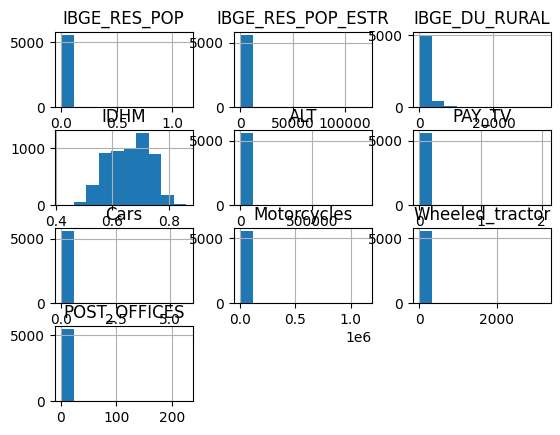

In [109]:
dados.hist(column=['IBGE_RES_POP','IBGE_RES_POP_ESTR','IBGE_DU_RURAL','IDHM','ALT',
                   'PAY_TV','Cars','Motorcycles','Wheeled_tractor','POST_OFFICES'])

In [112]:
dados['IBGE_RES_POP'].fillna(dados['IBGE_RES_POP'].median(),inplace=True)
dados['IBGE_RES_POP_ESTR'].fillna(dados['IBGE_RES_POP_ESTR'].median(),inplace=True)
dados['IBGE_DU_RURAL'].fillna(dados['IBGE_DU_RURAL'].median(),inplace=True)
dados['ALT'].fillna(dados['ALT'].median(),inplace=True)
dados['PAY_TV'].fillna(dados['PAY_TV'].median(),inplace=True)
dados['Cars'].fillna(dados['Cars'].median(),inplace=True)
dados['Motorcycles'].fillna(dados['Motorcycles'].median(),inplace=True)
dados['Wheeled_tractor'].fillna(dados['Wheeled_tractor'].median(),inplace=True)
dados['POST_OFFICES'].fillna(dados['POST_OFFICES'].median(),inplace=True)

dados['IDHM'].fillna(dados['IDHM'].mean(),inplace=True)

In [113]:
dados.isnull().sum()/len(dados.STATE)*100

STATE                     0.0
CAPITAL                   0.0
IBGE_RES_POP              0.0
IBGE_RES_POP_ESTR         0.0
IBGE_DU_RURAL             0.0
IBGE_PLANTED_AREA         0.0
IBGE_CROP_PRODUCTION_$    0.0
IDHM                      0.0
ALT                       0.0
PAY_TV                    0.0
RURAL_URBAN               0.0
GVA_AGROPEC               0.0
GVA_INDUSTRY              0.0
GVA_SERVICES              0.0
GVA_PUBLIC                0.0
TAXES                     0.0
GDP                       0.0
GDP_CAPITA                0.0
COMP_TOT                  0.0
COMP_A                    0.0
COMP_B                    0.0
COMP_C                    0.0
COMP_D                    0.0
COMP_E                    0.0
COMP_H                    0.0
COMP_J                    0.0
COMP_N                    0.0
COMP_O                    0.0
COMP_R                    0.0
COMP_S                    0.0
COMP_U                    0.0
Cars                      0.0
Motorcycles               0.0
Wheeled_tr

In [152]:
states = pd.get_dummies(dados.STATE)
rural = pd.get_dummies(dados.RURAL_URBAN)
concatenados = pd.concat([dados,states], axis =1)

In [155]:
concatenados1 = pd.concat([concatenados, rural], axis =1)

In [159]:
x = concatenados1.drop(['STATE','RURAL_URBAN','IDHM'], axis = 1)
y = dados['IDHM']

In [166]:
x.shape


(5570, 66)

In [160]:
x.head()

,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_ESTR,IBGE_DU_RURAL,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,ALT,PAY_TV,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,TAXES,GDP,GDP_CAPITA,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_H,COMP_J,COMP_N,COMP_O,COMP_R,COMP_S,COMP_U,Cars,Motorcycles,Wheeled_tractor,POST_OFFICES,GVA_TOTAL,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO,Intermediário Adjacente,Intermediário Remoto,Rural Adjacente,Rural Remoto,Sem classificação,Urbano
0,0,6876.0,0.0,591.0,319.0,1843.0,893.60,360.0,6.20,27991.25,74750.32,36915.04,20554.20,166.41,20664.57,284.0,5.0,1.0,56.0,0.0,2.0,26.0,5.0,12.0,4.0,1.0,5.0,0.0,2158.0,1246.0,0.0,1.0,145857.60,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,6704.0,0.0,847.0,4479.0,18017.0,753.12,77.0,50524.57,25917.70,62689.23,28083.79,12873.50,180.09,25591.70,476.0,6.0,6.0,30.0,1.0,2.0,70.0,11.0,29.0,2.0,6.0,19.0,0.0,2227.0,1142.0,0.0,1.0,167215.28,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,15757.0,148.0,1422.0,10307.0,33085.0,1017.55,227.0,42.84,16728.30,138198.58,63396.20,26822.58,287984.49,15628.40,288.0,5.0,9.0,26.0,0.0,2.0,12.0,2.0,15.0,3.0,1.0,8.0,0.0,2838.0,1426.0,0.0,3.0,261161.91,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,22690.0,0.0,1027.0,1862.0,7502.0,644.74,1230.0,113824.60,31002.62,172.33,86081.41,26994.09,430235.36,18250.42,621.0,18.0,1.0,40.0,0.0,1.0,62.0,9.0,27.0,2.0,9.0,27.0,0.0,6928.0,2953.0,0.0,4.0,403241.27,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,141100.0,60.0,12004.0,25200.0,700872.0,10.12,3389.0,140463.72,58610.00,468128.69,486872.40,95180.48,1249255.29,8222.36,931.0,4.0,2.0,43.0,0.0,1.0,16.0,6.0,16.0,2.0,15.0,56.0,0.0,5277.0,25661.0,0.0,2.0,1154074.81,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [161]:
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,test_size= 0.3)
modelo = RandomForestRegressor()

In [162]:
modelo.fit(x_treino,y_treino)

RandomForestRegressor()

In [164]:
modelo.score(x_teste,y_teste)

0.8592281429366928

In [165]:
modelo.score(x,y)

0.945475732842403